### **Module 5: Working with Time Series Data**
Time series data is essential in many AI applications (e.g., stock prices, sensor data). This module covers how to manipulate and analyze time-indexed data.

#### **Topics:**
- **DateTime Indexing:**
  - Parsing dates and setting them as the DataFrame index using `pd.to_datetime()`.

- **Time-based Selection:**
  - Selecting data using specific time ranges.

- **Resampling and Aggregating:**
  - Resampling data (e.g., to hourly, daily, or monthly frequencies) using `resample()`.
  - Aggregating data using functions such as `sum()`, `mean()`, etc.

#### **Hands-on Lab:**
- Load a time series dataset, parse date columns, and resample the data for different time intervals (e.g., monthly averages).

---

## **1. DateTime Indexing**  
### **Real-world Scenario 1:**  
A **smart home system** collects temperature readings every minute. You want to convert the timestamps and set them as an index to analyze time-based patterns.

### **Example: Temperature Readings**

In [2]:
import pandas as pd

# Temperature readings logged at different times
data = {
    'timestamp': ['2025-01-01 06:15', '2025-01-01 06:45', '2025-01-01 07:15', '2025-01-01 07:45'],
    'temperature': [19.5, 20.1, 21.0, 20.8]
}

df = pd.DataFrame(data)

# Convert timestamps and set index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

print(df)

                     temperature
timestamp                       
2025-01-01 06:15:00         19.5
2025-01-01 06:45:00         20.1
2025-01-01 07:15:00         21.0
2025-01-01 07:45:00         20.8


## **2. Time-based Selection**  
### **Real-world Scenario 2:**  
You’re working with **website traffic logs** and want to filter data for a specific date range (e.g., during a marketing campaign).

### **Example: Filtering Traffic Logs by Time Range**

In [4]:
# Sample data: Website visits during a campaign
data = {
    'timestamp': pd.date_range('2025-01-01', periods=10, freq='h'),
    'visits': [100, 120, 150, 300, 500, 700, 450, 220, 130, 90]
}

df = pd.DataFrame(data).set_index('timestamp')

# Select data for 3-hour window (e.g., Jan 1, 4:00 to 7:00 AM)
selected_data = df['2025-01-01 04:00':'2025-01-01 07:00']

print(selected_data)

                     visits
timestamp                  
2025-01-01 04:00:00     500
2025-01-01 05:00:00     700
2025-01-01 06:00:00     450
2025-01-01 07:00:00     220


## **3. Resampling and Aggregating**  
### **Real-world Scenario 3:**  
You’re monitoring **stock prices** and want to calculate daily and monthly trends from minute-by-minute data.

### **Example 1: Daily Average Stock Price**

In [6]:
# Simulated stock price data (minute-level)
data = {
    'timestamp': pd.date_range('2025-01-01', periods=120, freq='min'),  # Minute-by-minute
    'stock_price': [100 + i * 0.1 for i in range(120)]  # Simulate an increasing trend
}

df = pd.DataFrame(data).set_index('timestamp')

# Resample to daily frequency and compute mean
daily_average = df.resample('D').mean()

print(daily_average)

            stock_price
timestamp              
2025-01-01       105.95


### **Example 2: Monthly Sales Aggregation (Sum)**

In [9]:
# Simulated monthly sales data
sales_data = {
    'date': pd.date_range('2024-01-01', periods=365, freq='D'),
    'sales': [200 + (x % 30) * 5 for x in range(365)]  # Simulate a daily increase
}

df = pd.DataFrame(sales_data).set_index('date')

# Resample to monthly frequency and calculate total sales
monthly_sales = df.resample('ME').sum()

print(monthly_sales)

            sales
date             
2024-01-31   8375
2024-02-29   7975
2024-03-31   8375
2024-04-30   8175
2024-05-31   8380
2024-06-30   8175
2024-07-31   8385
2024-08-31   8390
2024-09-30   8175
2024-10-31   8395
2024-11-30   8175
2024-12-31   8175


## **4. Hands-on Lab: Full Example**  
### **Real-world Scenario 4:**  
You are analyzing **electricity usage** for a household. The dataset contains hourly data for an entire year. You need to:
1. Parse the dates.
2. Resample the data to weekly averages.
3. Plot the result.

### **Complete Hands-on Example**

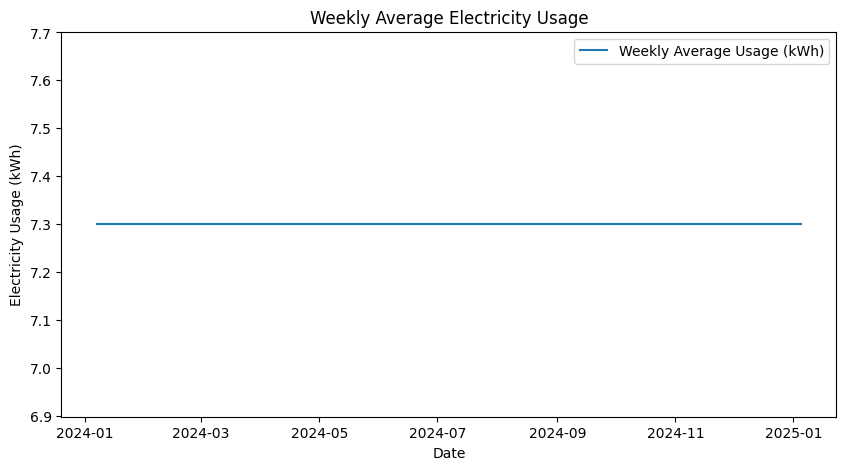

In [11]:
import matplotlib.pyplot as plt

# Load a time series dataset (hourly electricity usage)
data = {
    'timestamp': pd.date_range('2024-01-01', periods=8760, freq='h'),  # 8760 hours (365 days)
    'usage_kwh': [5 + (x % 24) * 0.2 for x in range(8760)]  # Varies hourly
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample data to weekly averages
weekly_avg = df.resample('W').mean()

# Plot the weekly average usage
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['usage_kwh'], label='Weekly Average Usage (kWh)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.title('Weekly Average Electricity Usage')
plt.legend()
plt.show()

### **Summary of Real-world Use Cases:**

1. **Temperature Monitoring**: Smart home system logs.
2. **Website Traffic Logs**: Filter visits during a campaign.
3. **Stock Market Analysis**: Resampling to daily and monthly prices.
4. **Electricity Usage**: Aggregating power usage to weekly trends.

## **1. Smart Home Energy Usage (Hourly to Daily)**  
### **Scenario:**  
A smart home records hourly **power consumption**. You need to calculate **daily totals** to analyze energy consumption patterns.

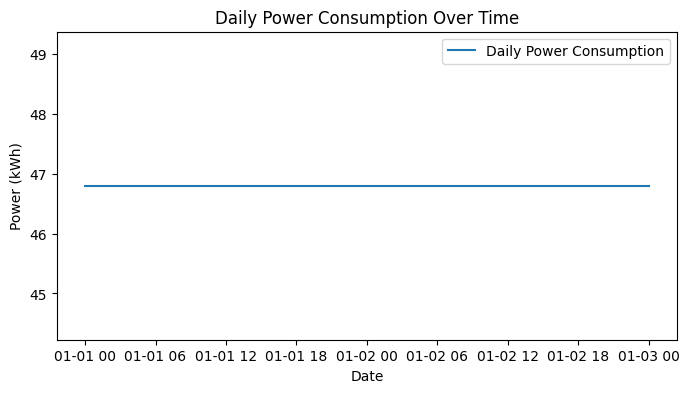

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample hourly data
data = {
    'timestamp': pd.date_range('2025-01-01', periods=72, freq='h'),  # 3 days of hourly data
    'power_consumed_kwh': [0.8 + (i % 24) * 0.1 for i in range(72)]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to daily frequency
daily_consumption = df.resample('D').sum()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(daily_consumption.index, daily_consumption['power_consumed_kwh'], label='Daily Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power (kWh)')
plt.title('Daily Power Consumption Over Time')
plt.legend()
plt.show()

## **2. Stock Prices (Minute to Daily)**  
### **Scenario:**  
You have minute-by-minute **stock prices** and want to calculate the **daily average stock price**.


In [15]:
# Simulated minute-level stock prices
stock_data = {
    'timestamp': pd.date_range('2025-01-01', periods=1440, freq='min'),  # One day of minute data
    'price': [100 + i * 0.05 for i in range(1440)]  # Trend upward by 0.05 per minute
}

df = pd.DataFrame(stock_data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to daily mean
daily_avg_price = df.resample('D').mean()

print(daily_avg_price)

              price
timestamp          
2025-01-01  135.975


## **3. Website Traffic (Hourly to Weekly)**  
### **Scenario:**  
You’re tracking website visits every hour and want to calculate **weekly totals**.

In [17]:
# Sample hourly website visits
web_data = {
    'timestamp': pd.date_range('2025-01-01', periods=500, freq='h'),  # Hourly for ~3 weeks
    'visits': [200 + (x % 24) * 5 for x in range(500)]  # Simulate hourly peak visits
}

df = pd.DataFrame(web_data).set_index('timestamp')
weekly_visits = df.resample('W').sum()

print(weekly_visits)

            visits
timestamp         
2025-01-05   30900
2025-01-12   43260
2025-01-19   43260
2025-01-26   11130


## **4. Retail Sales (Daily to Monthly)**  
### **Scenario:**  
A retail store tracks daily **sales**. You need to compute **monthly totals**.

In [19]:
sales_data = {
    'date': pd.date_range('2024-01-01', periods=365, freq='D'),
    'sales': [300 + (x % 30) * 10 for x in range(365)]  # Varies by month
}

df = pd.DataFrame(sales_data).set_index('date')
monthly_sales = df.resample('ME').sum()

print(monthly_sales)

            sales
date             
2024-01-31  13650
2024-02-29  13050
2024-03-31  13650
2024-04-30  13350
2024-05-31  13660
2024-06-30  13350
2024-07-31  13670
2024-08-31  13680
2024-09-30  13350
2024-10-31  13690
2024-11-30  13350
2024-12-31  13350


## **5. Temperature Readings (Hourly to Daily)**  
### **Scenario:**  
Weather stations log hourly **temperature readings**. You need to compute the **daily average temperature**.

In [21]:
temperature_data = {
    'timestamp': pd.date_range('2025-01-01', periods=72, freq='h'),
    'temperature_celsius': [15 + (i % 24) * 0.5 for i in range(72)]
}

df = pd.DataFrame(temperature_data).set_index('timestamp')
daily_avg_temp = df.resample('D').mean()

print(daily_avg_temp)

            temperature_celsius
timestamp                      
2025-01-01                20.75
2025-01-02                20.75
2025-01-03                20.75


## **6. Traffic Sensors (Minute to Hourly)**  
### **Scenario:**  
A city monitors traffic flow at intersections every minute. You need to calculate **hourly averages**.

In [23]:
traffic_data = {
    'timestamp': pd.date_range('2025-01-01', periods=240, freq='min'),  # 240 minutes (4 hours)
    'vehicles_counted': [5 + (x % 10) for x in range(240)]  # Random hourly trend
}

df = pd.DataFrame(traffic_data).set_index('timestamp')
hourly_traffic = df.resample('h').mean()

print(hourly_traffic)

                     vehicles_counted
timestamp                            
2025-01-01 00:00:00               9.5
2025-01-01 01:00:00               9.5
2025-01-01 02:00:00               9.5
2025-01-01 03:00:00               9.5


## **7. Fitness Tracker Data (Seconds to Hours)**  
### **Scenario:**  
A fitness tracker records **steps** every second. You need to calculate **hourly totals**.

In [25]:
fitness_data = {
    'timestamp': pd.date_range('2025-01-01', periods=3600, freq='s'),  # 1 hour of data (every second)
    'steps': [1 + (x % 60) for x in range(3600)]  # Steps per second
}

df = pd.DataFrame(fitness_data).set_index('timestamp')
hourly_steps = df.resample('h').sum()

print(hourly_steps)

             steps
timestamp         
2025-01-01  109800


## **8. Call Center Data (Hourly to Daily)**  
### **Scenario:**  
A call center logs the **number of calls** received hourly. You need to compute the **daily totals**.

In [27]:
call_data = {
    'timestamp': pd.date_range('2025-01-01', periods=100, freq='h'),  # ~4 days
    'calls_received': [10 + (x % 12) for x in range(100)]  # Pattern of calls
}

df = pd.DataFrame(call_data).set_index('timestamp')
daily_calls = df.resample('D').sum()

print(daily_calls)

            calls_received
timestamp                 
2025-01-01             372
2025-01-02             372
2025-01-03             372
2025-01-04             372
2025-01-05              46


## **9. Water Consumption (Daily to Monthly)**  
### **Scenario:**  
A water utility company records daily **water usage**. You need to calculate **monthly totals**.

In [29]:
water_data = {
    'date': pd.date_range('2025-01-01', periods=365, freq='D'),
    'liters_used': [1000 + (x % 30) * 50 for x in range(365)]  # Monthly pattern
}

df = pd.DataFrame(water_data).set_index('date')
monthly_water_usage = df.resample('ME').sum()

print(monthly_water_usage)

            liters_used
date                   
2025-01-31        52750
2025-02-28        48300
2025-03-31        54200
2025-04-30        51750
2025-05-31        52750
2025-06-30        51750
2025-07-31        52800
2025-08-31        52850
2025-09-30        51750
2025-10-31        52900
2025-11-30        51750
2025-12-31        52950


## **10. Heart Rate Monitor (Seconds to Minutes)**  
### **Scenario:**  
A heart rate monitor records **heartbeats** every second during a workout. You need to calculate **minute-level averages**.

In [31]:
heart_rate_data = {
    'timestamp': pd.date_range('2025-01-01 10:00', periods=300, freq='s'),  # 5 minutes
    'heart_rate': [70 + (x % 10) for x in range(300)]  # Small variations in heart rate
}

df = pd.DataFrame(heart_rate_data).set_index('timestamp')
minute_avg_heart_rate = df.resample('min').mean()

print(minute_avg_heart_rate)

                     heart_rate
timestamp                      
2025-01-01 10:00:00        74.5
2025-01-01 10:01:00        74.5
2025-01-01 10:02:00        74.5
2025-01-01 10:03:00        74.5
2025-01-01 10:04:00        74.5


### **Conclusion:**  
These **10 hands-on labs** cover scenarios from smart homes to fitness trackers and stock prices. They demonstrate how to:
1. Convert timestamps using `pd.to_datetime()`.
2. Set datetime indexes.
3. Resample and aggregate data to different frequencies.